# Importing Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [3]:
import os
os.chdir("/content/gdrive/My Drive/TUGASAKHIR")
!ls

Data.xlsx


In [4]:
import pandas as pd
Data = pd.read_excel('Data.xlsx')

In [5]:
Data.head(n=5)

,No,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,Berat,Tinggi,Cara Ukur,LiLA,BB/U,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB
0,1,FEYKE KAKANGA,P,2020-07-10,3.5,49.0,YURIKE RUDU,SULAWESI UTARA,KAB KEPULAUAN TALAUD,TAMPA NA'MMA,...,13.5,99,Berdiri,0.0,Berat Badan Normal,-1.22,Normal,-0.74,Normal,-1.14
1,2,GENOVIA BAWATAA,L,2022-08-16,3.7,50.0,ADEIDA SARUNGKE,SULAWESI UTARA,KAB KEPULAUAN TALAUD,RAINIS,...,10.5,80.2,Berdiri,0.0,Berat Badan Normal,-0.99,Normal,-1.74,Normal,-0.13
2,3,IMANUEL F MARASUT,L,2019-12-10,0.0,24.0,DEOL SASUE,SULAWESI UTARA,KAB KEPULAUAN TALAUD,ESSANG,...,15.0,99,Berdiri,0.0,Berat Badan Normal,-1.13,Normal,-1.76,Normal,-0.07
3,4,NATANIA PADU,P,2019-12-01,2.5,0.0,ANTO M,SULAWESI UTARA,KAB KEPULAUAN TALAUD,ESSANG,...,15.5,99,Berdiri,0.0,Berat Badan Normal,-0.75,Normal,-1.62,Normal,0.4
4,5,FAREL BATARA,L,2019-06-18,5.5,54.0,WILI BATARA,SULAWESI UTARA,KAB KEPULAUAN TALAUD,RAINIS,...,15.5,105,Berdiri,0.0,Berat Badan Normal,-1.25,Normal,-1.06,Normal,-0.99


In [6]:
Data.shape

(5050, 25)

# Data Preprocessing

In [7]:
dataNew = Data.drop_duplicates()

In [8]:
data = dataNew.drop(columns=['No', 'Nama', 'Tgl Lahir', 'BB Lahir', 'TB Lahir', 'Nama Ortu', 'Prov', 'Kab/Kota', 'Kec', 'Pukesmas', 'Desa/Kel', 'Alamat', 'Tanggal Pengukuran', 'Cara Ukur', 'ZS BB/TB', 'LiLA'])


In [9]:
# RENAME FEATURE

data.rename(columns={
    'JK': 'Gender',
    'Usia Saat Ukur': 'Age',
    'Berat': 'Weight',
    'Tinggi': 'Height',
    'BB/U': 'Weight/Age',
    'TB/U': 'Height/Age',
    'ZS TB/U': 'Z-Score',
    'BB/TB': 'Nutritional status',
    }, inplace=True)

data['Weight/Age'] = data['Weight/Age'].map({
    'Sangat Kurang': 'Severely Underweight',
    'Kurang': 'Underweight',
    'Berat Badan Normal': 'Normal',
    'Risiko Lebih': 'Risk of OverWeight'
 })

data['Height/Age'] = data['Height/Age'].map({
    'Tinggi': 'Tall',
    'Normal': 'Normal',
    'Pendek': 'Stunted',
    'Sangat Pendek': 'Severely Stunted'
})

data['Nutritional status'] = data['Nutritional status'].map({
    'Gizi Buruk': 'Malnutrition',
    'Gizi Kurang': 'Undernutrition',
    'Normal': 'Normal',
    'Beresiko Gizi Lebih': 'At Risk of Overnutrition',
    'Gizi Lebih': 'Overweight',
    'Obesitas': 'Obesity'
 })

In [10]:
data = data.replace("-", np.nan)

<ipython-input-10-16b0a73fc485>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace("-", np.nan)


In [11]:
print(data['Height/Age'].unique())

# Menghitung jumlah 'Normal' dan 'Tall'
count_normal_tall = data['Height/Age'].isin(['Normal', 'Tall']).sum()
count_normal_stunt = data['Height/Age'].isin(['Stunted', 'Severely Stunted']).sum()
print(f"Banyaknya kategori 'Normal' dan 'Tall': {count_normal_tall}")
print(f"Banyaknya kategori 'stunted' dan 'severly stunted': {count_normal_stunt}")

['Normal' 'Stunted' 'Severely Stunted' 'Tall']
Banyaknya kategori 'Normal' dan 'Tall': 4853
Banyaknya kategori 'stunted' dan 'severly stunted': 197


In [12]:
data.isnull().sum()

,0
Gender,0
Age,0
Weight,0
Height,1
Weight/Age,0
ZS BB/U,1
Height/Age,0
Z-Score,1
Nutritional status,2


In [13]:
data = data.dropna(subset=['Height', 'Z-Score', 'Nutritional status'])
data = data.reset_index(drop=True)

print(data.isnull().sum())

Gender                0
Age                   0
Weight                0
Height                0
Weight/Age            0
ZS BB/U               0
Height/Age            0
Z-Score               0
Nutritional status    0
dtype: int64


In [14]:
print(data['Height/Age'].unique())

# Menghitung jumlah 'Normal' dan 'Tall'
count_normal_tall = data['Height/Age'].isin(['Normal', 'Tall']).sum()
count_normal_stunt = data['Height/Age'].isin(['Stunted', 'Severely Stunted']).sum()
print(f"Banyaknya kategori 'Normal' dan 'Tall': {count_normal_tall}")
print(f"Banyaknya kategori 'stunted' dan 'severly stunted': {count_normal_stunt}")

['Normal' 'Stunted' 'Severely Stunted' 'Tall']
Banyaknya kategori 'Normal' dan 'Tall': 4853
Banyaknya kategori 'stunted' dan 'severly stunted': 195


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5048 non-null   object 
 1   Age                 5048 non-null   object 
 2   Weight              5048 non-null   float64
 3   Height              5048 non-null   float64
 4   Weight/Age          5048 non-null   object 
 5   ZS BB/U             5048 non-null   float64
 6   Height/Age          5048 non-null   object 
 7   Z-Score             5048 non-null   float64
 8   Nutritional status  5048 non-null   object 
dtypes: float64(4), object(5)
memory usage: 355.1+ KB


In [16]:
#CONVERT TYPE DATA AGE
def convert_age_to_months(age_str):
    """Fungsi untuk mengonversi usia dalam format string 'X Tahun - Y Bulan' menjadi jumlah bulan."""
    tahun, bulan = 0, 0
    # Pisahkan teks usia ke dalam tahun dan bulan
    parts = age_str.split('-')

    for part in parts:
        if 'Tahun' in part:
            tahun = int(part.split()[0])
        elif 'Bulan' in part:
            bulan = int(part.split()[0])

    return tahun * 12 + bulan

# Terapkan fungsi pada kolom 'Usia Saat Ukur'
data['Age(month)'] = data['Age'].apply(convert_age_to_months)

# Hapus kolom asli yang berisi string
data = data.drop(columns=['Age'])

In [17]:
#CONVERT TYPE DATA Nutritional status
from sklearn.preprocessing import LabelEncoder

# Menampilkan nilai unik dalam kolom status gizi
print(data['Nutritional status'].unique())

# Hapus baris dengan kategori 'Outlier'
data = data[data['Nutritional status'] != 'Outlier']

# Hitung ulang jumlah setiap kelas
kelas_count = data['Nutritional status'].value_counts()
kelas_count



['Normal' 'Undernutrition' 'At Risk of Overnutrition' 'Overweight'
 'Obesity' 'Malnutrition']


,count
Nutritional status,
Normal,4545
At Risk of Overnutrition,241
Undernutrition,191
Overweight,48
Obesity,13
Malnutrition,10


In [18]:
#ENCODING Nutritional status

from sklearn.preprocessing import LabelEncoder

data['Nutritional status'] = data['Nutritional status'].map({
    'Malnutrition': 2,
    'Undernutrition': 2,
    'Normal': 0,
    'At Risk of Overnutrition': 1,
    'Overnutrition': 1,
    'Obesity': 1
})

# Tampilkan hasil
print(data[['Nutritional status']].head())


   Nutritional status
0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0


In [19]:
#ENCODING Gender
data['Gender'] = data['Gender'].str.strip().map({'L': 0, 'P': 1})

In [20]:
#ENCODING Weight/Age
from sklearn.preprocessing import LabelEncoder

data['Weight/Age'] = data['Weight/Age'].map({
    'Severely Underweight': 0,
    'Underweight': 1,
    'Normal': 2,
    'Risk of OverWeight': 3
})

# Tampilkan hasil encoding
print(data[['Weight/Age']].head())


   Weight/Age
0           2
1           2
2           2
3           2
4           2


In [21]:
#ENCODING Height/Age
from sklearn.preprocessing import LabelEncoder

data['Height/Age'] = data['Height/Age'].map({
    'Normal': 0,
    'Tall': 0,
    'Stunted': 1,
    'Severely Stunted': 1
})

# Tampilkan hasil encoding
print(data[['Height/Age']].head())


   Height/Age
0           0
1           0
2           0
3           0
4           0


In [22]:
data.shape

(5048, 9)

# Data Visualization

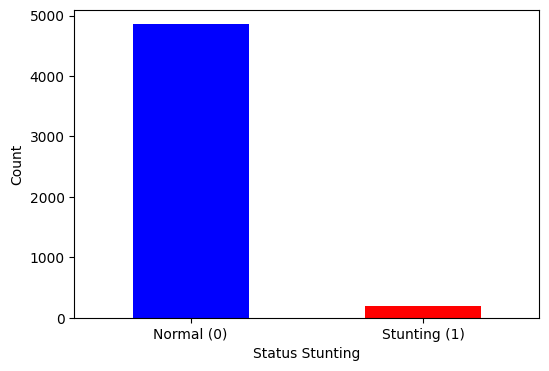

stunting (1): 195
normal (0): 4853


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah yang stunting (1) dan tidak stunting (0)
stunting_counts = data['Height/Age'].value_counts()

# Membuat bar plot
plt.figure(figsize=(6, 4))
stunting_counts.plot(kind='bar', color=['blue', 'red'])
#plt.title("Jumlah Stunting dan Normal")
plt.xlabel("Status Stunting")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Stunting (1)'], rotation=0)
plt.show()

print("stunting (1):", stunting_counts.get(1, 0))
print("normal (0):", stunting_counts.get(0, 0))

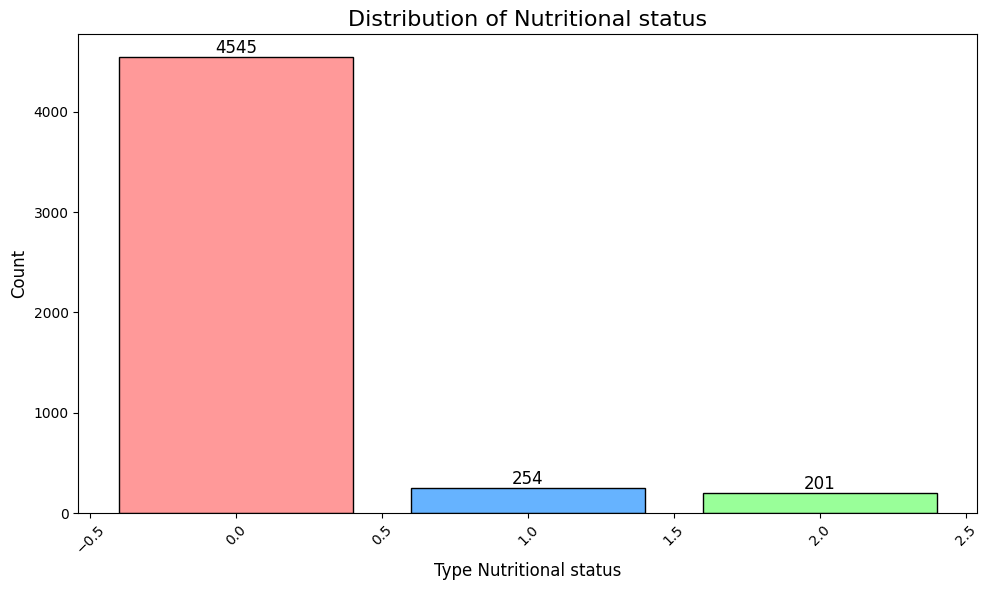

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah setiap kelas
kelas_count = data['Nutritional status'].value_counts()

# Warna untuk setiap kategori
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Buat diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(kelas_count.index, kelas_count.values, color=colors, edgecolor='black')

# Tambahkan nilai di atas setiap batang
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(bar.get_height()),
        ha='center', va='bottom', fontsize=12
    )

# Atur label sumbu dan judul
plt.xlabel('Type Nutritional status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Nutritional status', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Tampilkan plot
plt.show()


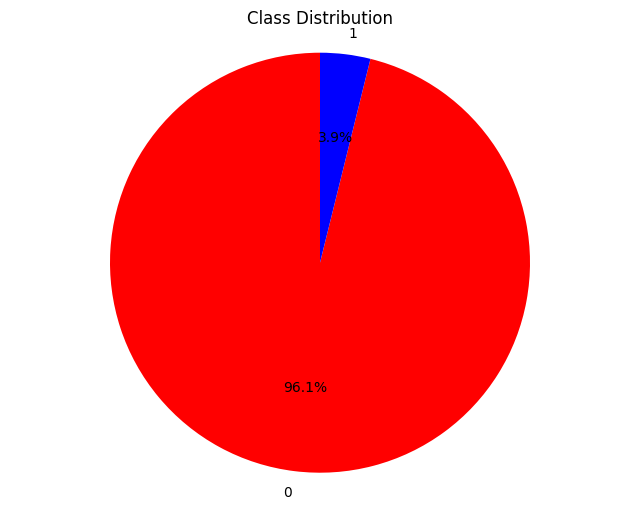

In [25]:
# Hitung jumlah setiap kelas
kelas_count = data['Height/Age'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas_count, labels=kelas_count.index, autopct='%1.1f%%', startangle=90, colors=['red','blue','black'])
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.title('Class Distribution')
plt.show()


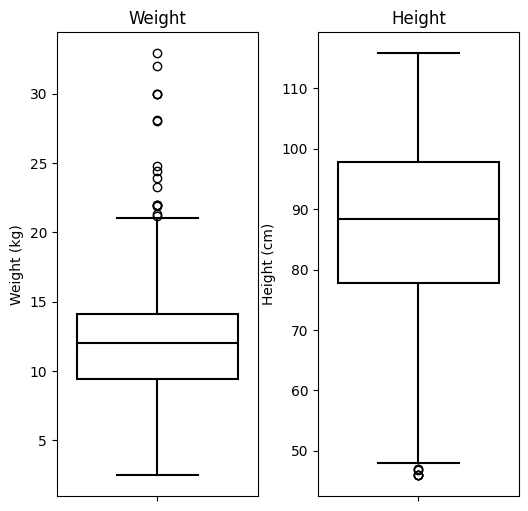

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Weight', 'Height']
units = ['Weight (kg)', 'Height (cm)', 'Z-Score', 'Age (months)']  # Label dengan satuan SI
plt.figure(figsize=(8, 10))

for i, (feature, unit) in enumerate(zip(features, units), 1):
    ax = plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature], linewidth=1.5, color='black',
                boxprops=dict(edgecolor='black', facecolor='none'), ax=ax)
    ax.set_title(feature)
    ax.set_ylabel(unit)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


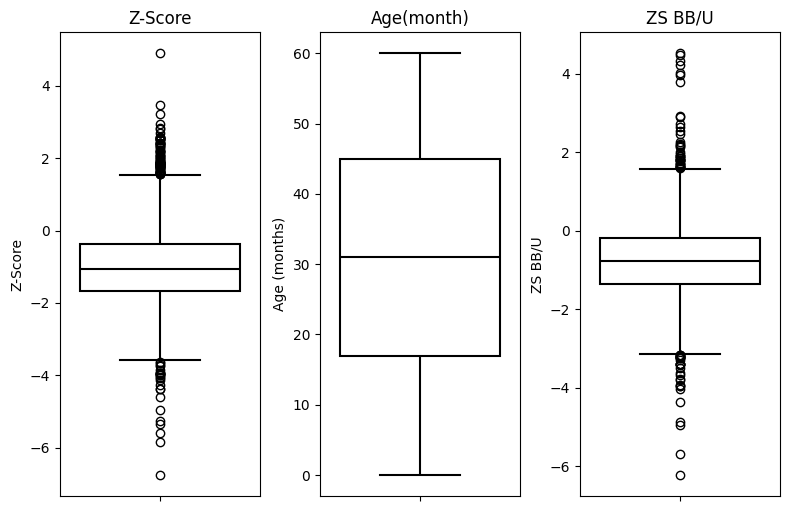

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Z-Score', 'Age(month)', 'ZS BB/U']

units = ['Z-Score', 'Age (months)', 'ZS BB/U']  # Label dengan satuan SI
plt.figure(figsize=(8, 10))

for i, (feature, unit) in enumerate(zip(features, units), 1):
    ax = plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature], linewidth=1.5, color='black',
                boxprops=dict(edgecolor='black', facecolor='none'), ax=ax)
    ax.set_title(feature)
    ax.set_ylabel(unit)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


Mengatasi outlier

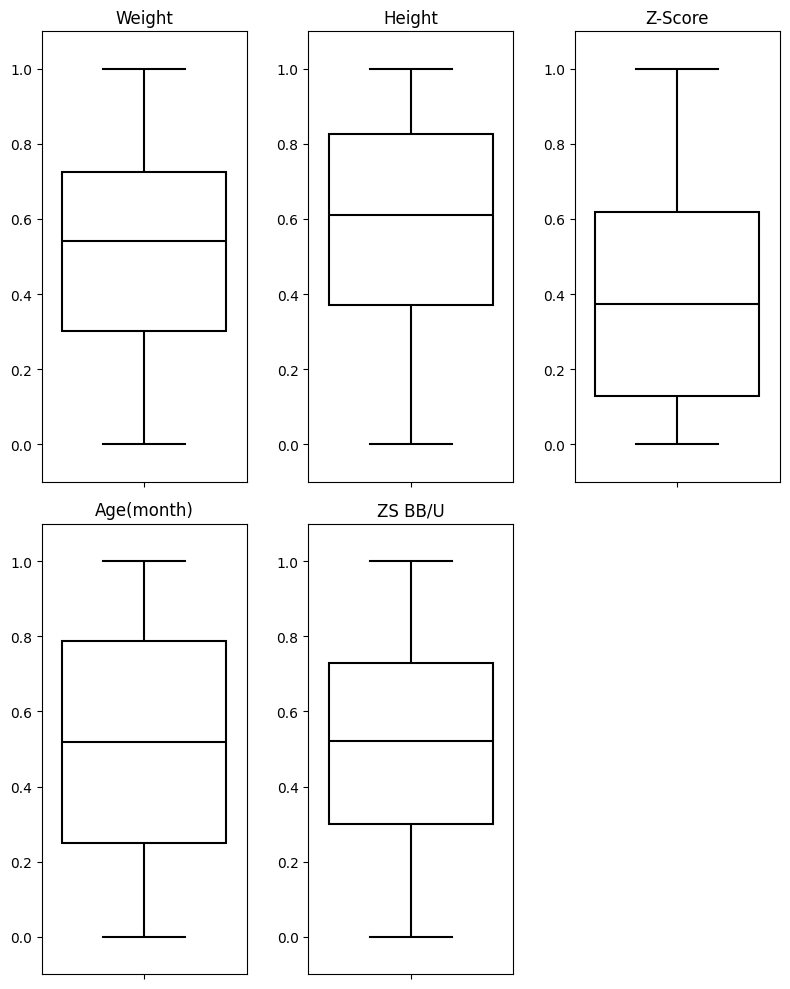

In [29]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

#Identifikasi outlier menggunakan IQR dan ganti dengan median jika ada outlier
def handle_outliers_with_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ganti nilai outlier dengan median
        median = data[feature].median()
        data[feature] = data[feature].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return data

#Winsorization
def apply_winsorization(data, features, limits=[0.05, 0.05]):
    for feature in features:
        data[feature] = winsorize(data[feature], limits=limits)
    return data

#Normalisasi fitur
def scale_features(data, features):
    scaler = MinMaxScaler()
    data[features] = scaler.fit_transform(data[features])
    return data

#Visualisasi boxplot final
def plot_boxplots(data, features):
    plt.figure(figsize=(8, 10))
    for i, feature in enumerate(features, 1):
        ax = plt.subplot(2, 3, i)
        sns.boxplot(y=data[feature], linewidth=1.5, color='black',
                    boxprops=dict(edgecolor='black', facecolor='none'), ax=ax)
        ax.set_title(feature)
        ax.set_ylabel('')

        ax.set_ylim(data[feature].min() - 0.1, data[feature].max() + 0.1)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)
    plt.show()


# Implementasi pada dataset
features = ['Weight', 'Height', 'Z-Score', 'Age(month)', 'ZS BB/U']
data = handle_outliers_with_iqr(data, features)
data = apply_winsorization(data, features)
col_to_scale = ['Weight', 'Height', 'Z-Score', 'Age(month)', 'ZS BB/U']
data = scale_features(data, col_to_scale)

plot_boxplots(data, col_to_scale)

In [30]:
data.isnull().sum()

,0
Gender,0
Weight,0
Height,0
Weight/Age,0
ZS BB/U,0
Height/Age,0
Z-Score,0
Nutritional status,48
Age(month),0


In [31]:
data['Nutritional status'].fillna(data['Nutritional status'].mean(), inplace=True)


<ipython-input-31-9d39c1625f3b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Nutritional status'].fillna(data['Nutritional status'].mean(), inplace=True)


In [32]:
data.isnull().sum()

,0
Gender,0
Weight,0
Height,0
Weight/Age,0
ZS BB/U,0
Height/Age,0
Z-Score,0
Nutritional status,0
Age(month),0


# Data Balancing

In [ ]:
pip install imbalanced-learn

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Pisahkan dataset menjadi training dan testing
X = data[['Weight', 'Height', 'Age(month)', 'Nutritional status', 'Gender', 'Weight/Age', 'Z-Score', 'ZS BB/U']]
y = data['Height/Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gabungkan kembali data training untuk balancing
train_data = pd.concat([X_train, y_train], axis=1)

# Pisahkan data training berdasarkan kelas
minority_class = train_data[train_data['Height/Age'] == 1]  # Kelas stunting (minoritas)
majority_class = train_data[train_data['Height/Age'] == 0]  # Kelas normal (mayoritas)

features = ['Weight', 'Height', 'Age(month)', 'Nutritional status', 'Gender', 'Weight/Age', 'Z-Score', 'ZS BB/U']

# Batas bawah (Q1) dan batas atas (Q3) untuk setiap fitur pada kelas minoritas
q1 = minority_class[features].quantile(0.25)
q3 = minority_class[features].quantile(0.75)

# Jumlah data baru yang diinginkan untuk kelas minoritas
additional_minority_count = 4000

# Oversampling
oversampled_data = []
while len(oversampled_data) < additional_minority_count:
    random_sample = {feature: np.random.uniform(low=q1[feature], high=q3[feature]) for feature in features}
    random_sample['Height/Age'] = 1  # Tetapkan label sebagai stunting
    oversampled_data.append(random_sample)

# Ubah data oversampling menjadi DataFrame
oversampled_data = pd.DataFrame(oversampled_data)

# Gabungkan data training asli dengan data oversampled
balanced_train_data = pd.concat([majority_class, minority_class, oversampled_data], ignore_index=True)

# Pisahkan kembali X_train dan y_train setelah balancing
X_train_balanced = balanced_train_data[features]
y_train_balanced = balanced_train_data['Height/Age']

# Hasil
print("Jumlah data sebelum oversampling pada training set:")
print(train_data['Height/Age'].value_counts())
print("\nJumlah data setelah oversampling pada training set:")
print(balanced_train_data['Height/Age'].value_counts())


Jumlah data sebelum oversampling pada training set:
Height/Age
0    3882
1     156
Name: count, dtype: int64

Jumlah data setelah oversampling pada training set:
Height/Age
1    4156
0    3882
Name: count, dtype: int64


In [35]:
balanced_train_data.head()

,Weight,Height,Age(month),Nutritional status,Gender,Weight/Age,Z-Score,ZS BB/U,Height/Age
0,0.697248,0.600462,0.519231,1.0,1.0,2.0,0.401606,0.981273,0
1,0.788991,0.891455,0.903846,0.0,0.0,2.0,0.373494,0.404494,0
2,0.495413,0.357968,0.211538,1.0,1.0,3.0,0.702811,1.000000,0
3,0.825688,0.852194,0.826923,0.0,1.0,2.0,0.489960,0.666667,0
4,1.000000,1.000000,1.000000,0.0,1.0,2.0,1.000000,1.000000,0


In [36]:
X_test.shape

(1010, 8)

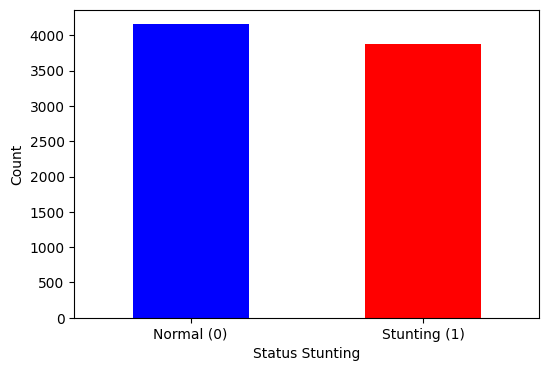

Jumlah yang stunting (1): 4156
Jumlah yang tidak stunting (0): 3882


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah yang stunting (1) dan tidak stunting (0)
stunting_counts = balanced_train_data['Height/Age'].value_counts()

# Membuat bar plot
plt.figure(figsize=(6, 4))
stunting_counts.plot(kind='bar', color=['blue', 'red'])
#plt.title("Jumlah Stunting dan Tidak Stunting")
plt.xlabel("Status Stunting")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Stunting (1)'], rotation=0)
plt.show()

print("Jumlah yang stunting (1):", stunting_counts.get(1, 0))
print("Jumlah yang tidak stunting (0):", stunting_counts.get(0, 0))

# Model Random Forest

Parameter default (Final)

Fold 1 Results:
Accuracy: 0.9790
Confusion Matrix:
[[956  15]
 [ 23 816]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9765    0.9846    0.9805       971
    Stunting     0.9819    0.9726    0.9772       839

    accuracy                         0.9790      1810
   macro avg     0.9792    0.9786    0.9789      1810
weighted avg     0.9790    0.9790    0.9790      1810

--------------------------------------------------


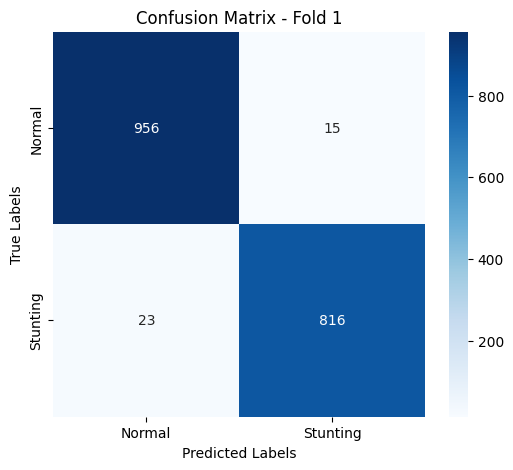

Fold 2 Results:
Accuracy: 0.9713
Confusion Matrix:
[[947  24]
 [ 28 811]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9713    0.9753    0.9733       971
    Stunting     0.9713    0.9666    0.9689       839

    accuracy                         0.9713      1810
   macro avg     0.9713    0.9710    0.9711      1810
weighted avg     0.9713    0.9713    0.9713      1810

--------------------------------------------------


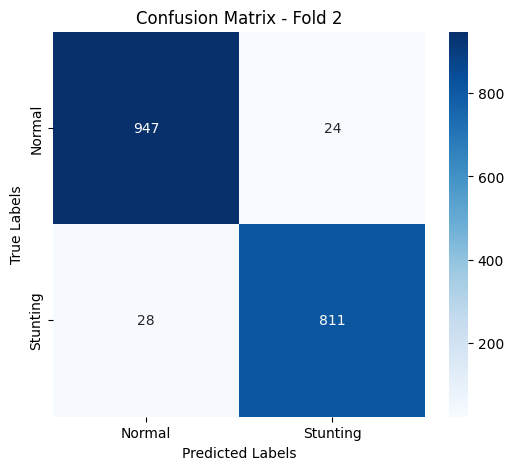

Fold 3 Results:
Accuracy: 0.9729
Confusion Matrix:
[[952  19]
 [ 30 809]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9695    0.9804    0.9749       971
    Stunting     0.9771    0.9642    0.9706       839

    accuracy                         0.9729      1810
   macro avg     0.9733    0.9723    0.9728      1810
weighted avg     0.9730    0.9729    0.9729      1810

--------------------------------------------------


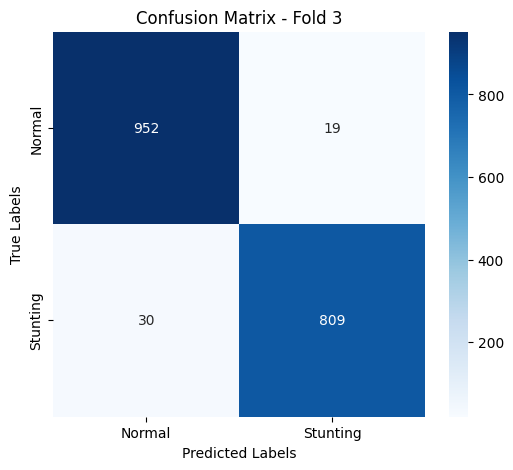

Fold 4 Results:
Accuracy: 0.9663
Confusion Matrix:
[[936  34]
 [ 27 812]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9720    0.9649    0.9684       970
    Stunting     0.9598    0.9678    0.9638       839

    accuracy                         0.9663      1809
   macro avg     0.9659    0.9664    0.9661      1809
weighted avg     0.9663    0.9663    0.9663      1809

--------------------------------------------------


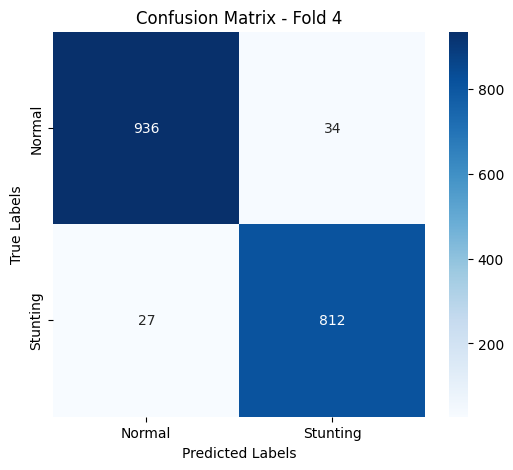

Fold 5 Results:
Accuracy: 0.9740
Confusion Matrix:
[[949  21]
 [ 26 813]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9733    0.9784    0.9758       970
    Stunting     0.9748    0.9690    0.9719       839

    accuracy                         0.9740      1809
   macro avg     0.9741    0.9737    0.9739      1809
weighted avg     0.9740    0.9740    0.9740      1809

--------------------------------------------------


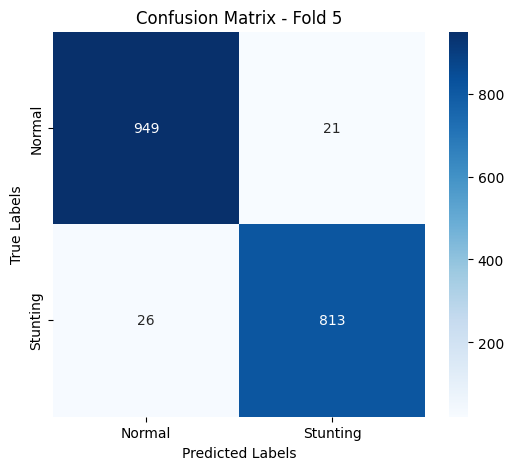


Overall K-Fold Results:
Accuracy per fold: [0.9790055248618784, 0.9712707182320443, 0.9729281767955801, 0.9662797125483693, 0.9740187949143173]
Mean Accuracy: 0.9727005854704378
Standard Deviation: 0.004118588692252148


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Inisialisasi K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Untuk menyimpan hasil setiap fold
fold_results = []
fold_number = 1

for train_index, test_index in kf.split(X_train_balanced, y_train_balanced):

    # Membagi data berdasarkan indeks fold
    X_train, X_valid = X_train_balanced.iloc[train_index], X_train_balanced.iloc[test_index]
    y_train, y_valid = y_train_balanced.iloc[train_index], y_train_balanced.iloc[test_index]

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_valid)

    acc = accuracy_score(y_valid, y_pred)
    fold_results.append(acc)

    # Print hasil per fold
    print(f"Fold {fold_number} Results:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_valid, y_pred)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_valid, y_pred, target_names=['Normal', 'Stunting'], digits=4))
    print("-" * 50)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Stunting'], yticklabels=['Normal', 'Stunting'])
    plt.title(f"Confusion Matrix - Fold {fold_number}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    fold_number += 1

# Rata-rata hasil K-Fold
print("\nOverall K-Fold Results:")
print("Accuracy per fold:", fold_results)
print("Mean Accuracy:", np.mean(fold_results))
print("Standard Deviation:", np.std(fold_results))



Final Model Evaluation on Test Data:
Accuracy: 0.9832

Confusion Matrix
[[963   8]
 [  9  30]]

Classification Report
              precision    recall  f1-score   support

      Normal     0.9907    0.9918    0.9913       971
    Stunting     0.7895    0.7692    0.7792        39

    accuracy                         0.9832      1010
   macro avg     0.8901    0.8805    0.8852      1010
weighted avg     0.9830    0.9832    0.9831      1010



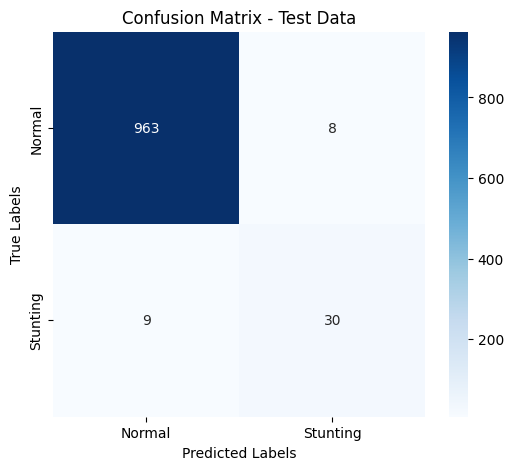

In [39]:
# Evaluasi Hasil Akhir pada Data Testing (20%)

# Latih model pada seluruh data training
rf_model.fit(X_train_balanced, y_train_balanced)

# Prediksi probabilitas pada data testing
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas Stunting

# Prediksi dengan threshold default (0.5)
y_test_pred_default = (y_test_proba >= 0.5).astype(int)

# Penyesuaian Threshold
threshold = 0.4
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)

# Evaluasi dengan threshold baru
print("\nFinal Model Evaluation on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_adjusted):.4f}")
cm_test_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)
print("\nConfusion Matrix")
print(cm_test_adjusted)
print("\nClassification Report")
print(classification_report(y_test, y_test_pred_adjusted, target_names=['Normal', 'Stunting'], digits=4))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Stunting'], yticklabels=['Normal', 'Stunting'])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Mencari best hyperparameter

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Initialize RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the model with the training data
grid_rfc.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = grid_rfc.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Optionally, evaluate the model with the best hyperparameters
best_model = grid_rfc.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy on test set: 0.9331122166943062


# Model XGBoost

Default parameter

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Results:
Accuracy: 0.9834
Confusion Matrix:
[[962   9]
 [ 21 818]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.99      0.98       971
    Stunting       0.99      0.97      0.98       839

    accuracy                           0.98      1810
   macro avg       0.98      0.98      0.98      1810
weighted avg       0.98      0.98      0.98      1810

--------------------------------------------------


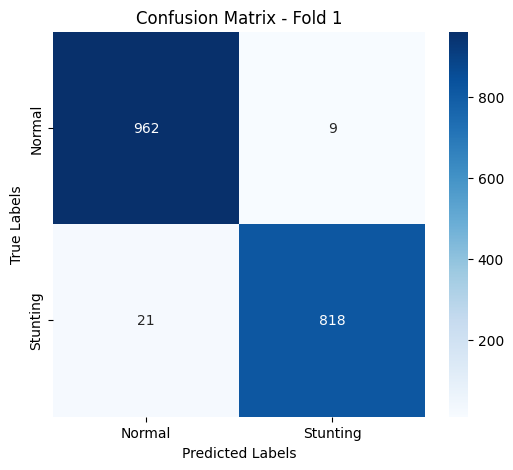

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:46:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Results:
Accuracy: 0.9773
Confusion Matrix:
[[957  14]
 [ 27 812]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98       971
    Stunting       0.98      0.97      0.98       839

    accuracy                           0.98      1810
   macro avg       0.98      0.98      0.98      1810
weighted avg       0.98      0.98      0.98      1810

--------------------------------------------------


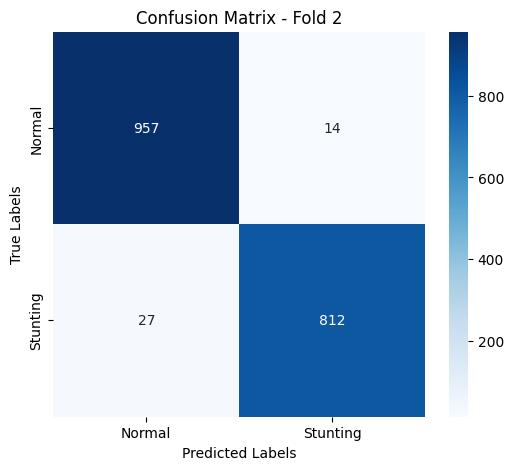

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:46:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 Results:
Accuracy: 0.9718
Confusion Matrix:
[[953  18]
 [ 33 806]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       971
    Stunting       0.98      0.96      0.97       839

    accuracy                           0.97      1810
   macro avg       0.97      0.97      0.97      1810
weighted avg       0.97      0.97      0.97      1810

--------------------------------------------------


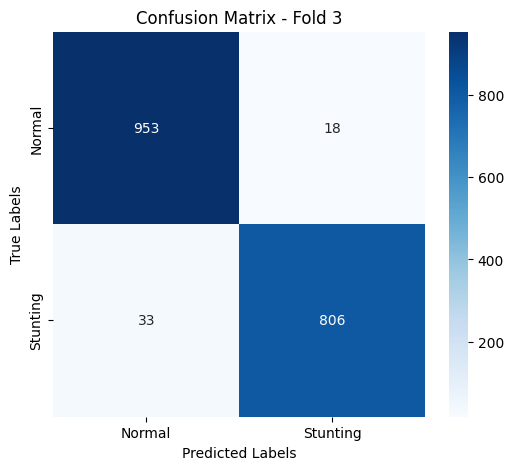

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 Results:
Accuracy: 0.9713
Confusion Matrix:
[[951  19]
 [ 33 806]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       970
    Stunting       0.98      0.96      0.97       839

    accuracy                           0.97      1809
   macro avg       0.97      0.97      0.97      1809
weighted avg       0.97      0.97      0.97      1809

--------------------------------------------------


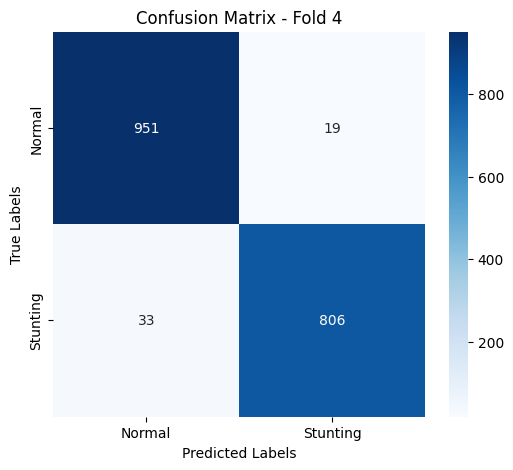

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:46:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 Results:
Accuracy: 0.9784
Confusion Matrix:
[[958  12]
 [ 27 812]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98       970
    Stunting       0.99      0.97      0.98       839

    accuracy                           0.98      1809
   macro avg       0.98      0.98      0.98      1809
weighted avg       0.98      0.98      0.98      1809

--------------------------------------------------


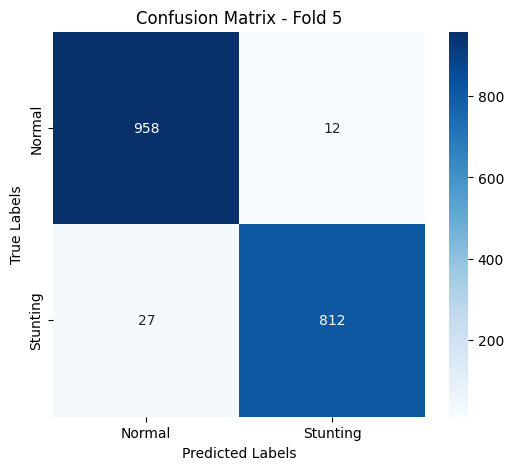


Overall K-Fold Results:
Accuracy per fold: [0.9834254143646409, 0.9773480662983426, 0.9718232044198895, 0.9712548369264787, 0.978441127694859]
Mean Accuracy: 0.9764585299408421
Standard Deviation: 0.00451273998881052


In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Inisialisasi K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Untuk menyimpan hasil setiap fold
fold_results = []
fold_number = 1

for train_index, test_index in kf.split(X_train_balanced, y_train_balanced):
    # Membagi data berdasarkan indeks fold
    X_train, X_valid = X_train_balanced.iloc[train_index], X_train_balanced.iloc[test_index]
    y_train, y_valid = y_train_balanced.iloc[train_index], y_train_balanced.iloc[test_index]

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_valid)

    # Evaluasi pada fold ini
    acc = accuracy_score(y_valid, y_pred)
    fold_results.append(acc)

    # Print hasil per fold
    print(f"Fold {fold_number} Results:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_valid, y_pred)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_valid, y_pred, target_names=['Normal', 'Stunting']))
    print("-" * 50)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Stunting'], yticklabels=['Normal', 'Stunting'])
    plt.title(f"Confusion Matrix - Fold {fold_number}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    fold_number += 1

# Rata-rata hasil K-Fold
print("\nOverall K-Fold Results:")
print("Accuracy per fold:", fold_results)
print("Mean Accuracy:", np.mean(fold_results))
print("Standard Deviation:", np.std(fold_results))


Mencari best hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definisikan model XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Tentukan grid hyperparameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Latih model dengan GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Tampilkan best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}


Menggunakan best hyperparameter (Final)

Fold 1 Results:
Accuracy: 0.9867
Confusion Matrix:
[[966   5]
 [ 19 820]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9807    0.9949    0.9877       971
    Stunting     0.9939    0.9774    0.9856       839

    accuracy                         0.9867      1810
   macro avg     0.9873    0.9861    0.9867      1810
weighted avg     0.9868    0.9867    0.9867      1810

--------------------------------------------------


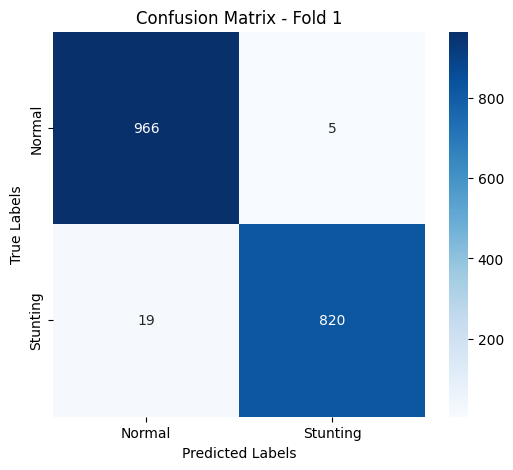

Fold 2 Results:
Accuracy: 0.9773
Confusion Matrix:
[[953  18]
 [ 23 816]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9764    0.9815    0.9789       971
    Stunting     0.9784    0.9726    0.9755       839

    accuracy                         0.9773      1810
   macro avg     0.9774    0.9770    0.9772      1810
weighted avg     0.9774    0.9773    0.9773      1810

--------------------------------------------------


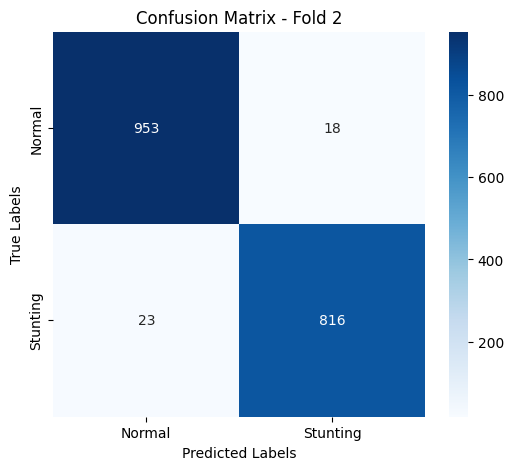

Fold 3 Results:
Accuracy: 0.9729
Confusion Matrix:
[[954  17]
 [ 32 807]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9675    0.9825    0.9750       971
    Stunting     0.9794    0.9619    0.9705       839

    accuracy                         0.9729      1810
   macro avg     0.9735    0.9722    0.9727      1810
weighted avg     0.9730    0.9729    0.9729      1810

--------------------------------------------------


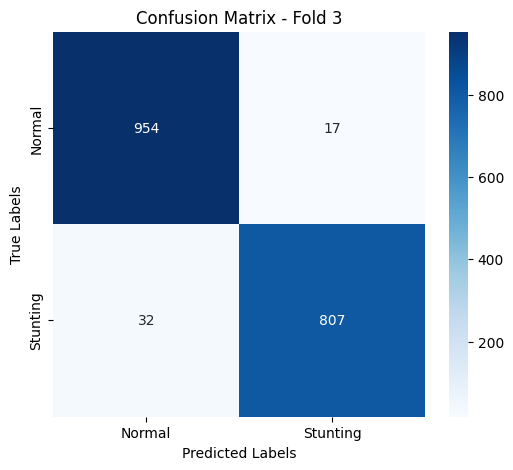

Fold 4 Results:
Accuracy: 0.9713
Confusion Matrix:
[[951  19]
 [ 33 806]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9665    0.9804    0.9734       970
    Stunting     0.9770    0.9607    0.9688       839

    accuracy                         0.9713      1809
   macro avg     0.9717    0.9705    0.9711      1809
weighted avg     0.9713    0.9713    0.9712      1809

--------------------------------------------------


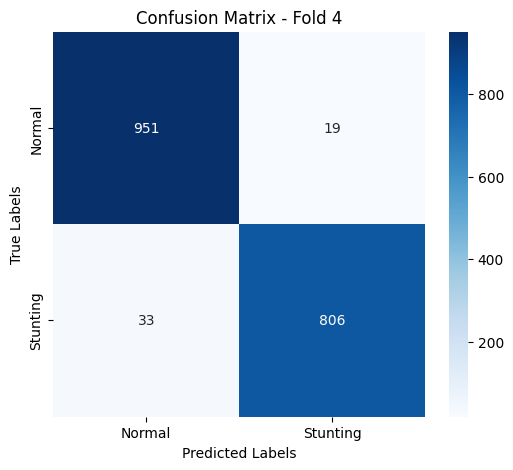

Fold 5 Results:
Accuracy: 0.9757
Confusion Matrix:
[[953  17]
 [ 27 812]]

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9724    0.9825    0.9774       970
    Stunting     0.9795    0.9678    0.9736       839

    accuracy                         0.9757      1809
   macro avg     0.9760    0.9751    0.9755      1809
weighted avg     0.9757    0.9757    0.9757      1809

--------------------------------------------------


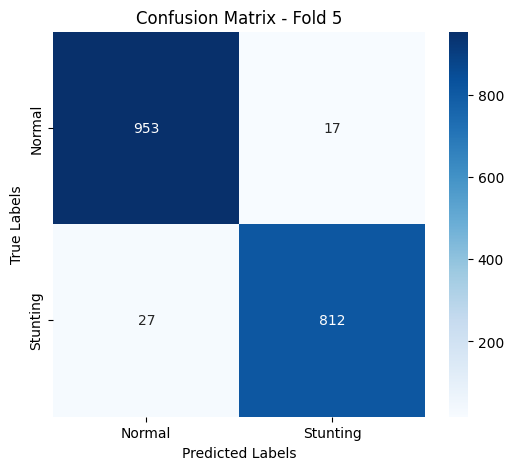


Overall K-Fold Results:
Accuracy per fold: [0.9867403314917127, 0.9773480662983426, 0.9729281767955801, 0.9712548369264787, 0.9756771697070205]
Mean Accuracy: 0.9767897162438268
Standard Deviation: 0.005405749427403564


In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model XGBoost dengan hyperparameters terbaik
xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=10,
    n_estimators=300,
    subsample=1.0,
    random_state=42,
    eval_metric='logloss'
)

# Inisialisasi K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Untuk menyimpan hasil setiap fold
fold_results = []
fold_number = 1

for train_index, test_index in kf.split(X_train_balanced, y_train_balanced):
    # Membagi data berdasarkan indeks fold
    X_train, X_valid = X_train_balanced.iloc[train_index], X_train_balanced.iloc[test_index]
    y_train, y_valid = y_train_balanced.iloc[train_index], y_train_balanced.iloc[test_index]

    # Latih model
    xgb_model.fit(X_train, y_train)

    # Prediksi pada data validasi
    y_pred = xgb_model.predict(X_valid)

    # Evaluasi pada fold ini
    acc = accuracy_score(y_valid, y_pred)
    fold_results.append(acc)

    # Print hasil per fold
    print(f"Fold {fold_number} Results:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_valid, y_pred)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_valid, y_pred, target_names=['Normal', 'Stunting'], digits=4))
    print("-" * 50)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Stunting'], yticklabels=['Normal', 'Stunting'])
    plt.title(f"Confusion Matrix - Fold {fold_number}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    fold_number += 1

# Rata-rata hasil K-Fold
print("\nOverall K-Fold Results:")
print("Accuracy per fold:", fold_results)
print("Mean Accuracy:", np.mean(fold_results))
print("Standard Deviation:", np.std(fold_results))



Final Model Evaluation on Test Data
Accuracy: 0.9842

Confusion Matrix
[[964   7]
 [  9  30]]

Classification Report
              precision    recall  f1-score   support

      Normal     0.9908    0.9928    0.9918       971
    Stunting     0.8108    0.7692    0.7895        39

    accuracy                         0.9842      1010
   macro avg     0.9008    0.8810    0.8906      1010
weighted avg     0.9838    0.9842    0.9840      1010



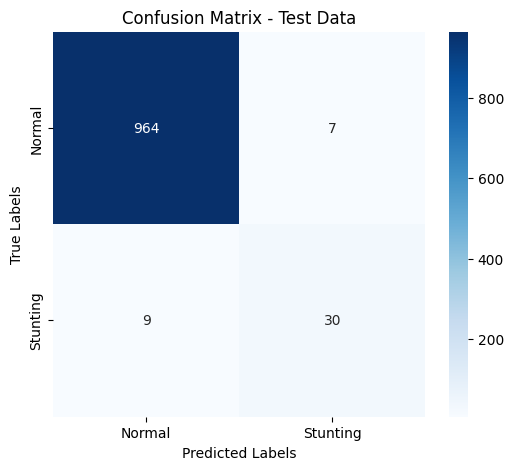

In [41]:
# Evaluasi Hasil Akhir pada Data Testing (20%)

# Latih model pada seluruh data training (80%)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Prediksi probabilitas pada data testing
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas Stunting

# Prediksi dengan threshold default (0.5)
y_test_pred_default = (y_test_proba >= 0.5).astype(int)

# Penyesuaian Threshold
threshold = 0.4
y_test_pred_adjusted = (y_test_proba >= threshold).astype(int)

# Evaluasi
print("\nFinal Model Evaluation on Test Data")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_adjusted):.4f}")
cm_test_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)
print("\nConfusion Matrix")
print(cm_test_adjusted)
print("\nClassification Report")
print(classification_report(y_test, y_test_pred_adjusted, target_names=['Normal', 'Stunting'], digits=4))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Stunting'], yticklabels=['Normal', 'Stunting'])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()